# COM2004/3004 Assignment 2: Code Snippets

v1.0 30/10/2016

This notebook contains some Python code snippets that you may find useful when working on COM2004/COM3004 assignment 2.


## 1. Loading the data

The cell below shows you how to load the data from the pickle file.

In [19]:
import pickle
data = pickle.load(open("assignment2.pkl", "rb"))
train_data = data['train_data']
train_labels = data['train_labels']
test1 = data['test1']
test2 = data['test2']
words  = data['words']

## 2. Displaying a character

The cell below displays a sample of the character data as an image.

5


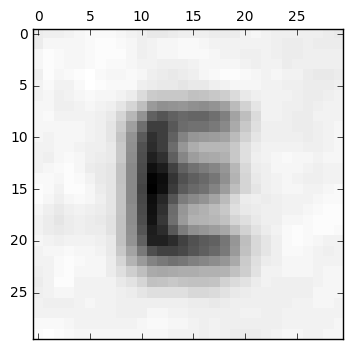

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

n = 1 # Select the 18th sample
pixels = train_data[n, :]
plt.matshow(np.reshape(pixels, (30, 30), order='F'), cmap=cm.gray)

print(train_labels[n])

## 3. The $k$-Nearest Neighbour Classifier

The cell below contains the $k$-NN classifier function that is being used in the lab classes.

In [21]:
def classify(train, train_labels, test):
    """Nearest neighbour classification

    train - matrix of training data (one sample per row)
    train_labels - corresponding training data labels
    test - matrix of samples to classify

    returns: labels - vector of test data labels
    """
    x = np.dot(test, train.transpose())
    modtest = np.sqrt(np.sum(test*test, axis=1))
    modtrain = np.sqrt(np.sum(train*train, axis=1))
    dist = x / np.outer(modtest, modtrain.transpose())  # cosine distance
    nearest = np.argmax(dist, axis=1)
    labels = train_labels[nearest]
    return labels


# 4. Using the classifier

The code below shows an example of using the classifier. 

(For demonstration purposes the training data has been cut into smaller training and test sets. In the assignment you will use all the training data for training and will be testing on test samples extracted from the images.)

In [22]:
import numpy as np

# Use first 599 samples of train_data for training
train1_data = train_data[0:599, :]
train1_labels = train_labels[0:599]

# Use last 100 samples of train_data for testing
test1_data = train_data[599:, :]
test1_labels = train_labels[599:]

# Count how many samples in the test set
n_test = test1_labels.shape[0]

# Classify the test set to get an array of guessed labels
test1_guessed = classify(train1_data, train1_labels, test1_data)

# Compare guesses against true labels and compute percent correct
pcor = np.sum(test1_guessed == test1_labels) * 100.0 / n_test

print(pcor)  # This should give 92% correct

92.0


# Step 1: Preprocessing

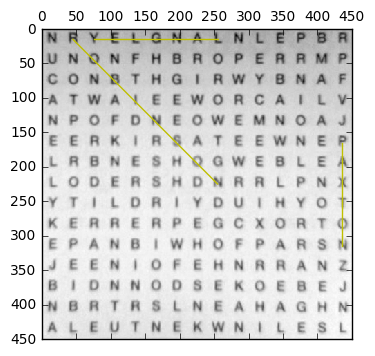

In [60]:
#Note: move the function to Display the result.
import types
GRID_LENGTH=15

def draw_line(graph, start, end, side_length):
    """This draws a line on a pyplot between two letters.
       graph: the pyplot to draw on
       start_letter: where the line begins, can be a coordinate or index.
       end_letter: where the line ends, can be a coordinate or index."""
    
    if (isinstance(start, int)):
        draw_line(graph, [start % GRID_LENGTH,start//GRID_LENGTH], [end % GRID_LENGTH,end//GRID_LENGTH], side_length)
    else:
        # get starting x-coordinate, get ending x-coordinate.
        xSxE=[start[0]*side_length+GRID_LENGTH,end[0]*side_length+GRID_LENGTH]
        # get starting y-coordinate, get ending y-coordinate.
        ySyE=[start[1]*side_length+GRID_LENGTH,end[1]*side_length+GRID_LENGTH]
        # Plot a yellow line on the graph
        plt.xlim(0, GRID_LENGTH*side_length)
        plt.ylim(GRID_LENGTH*side_length, 0)
        graph.plot(xSxE, ySyE, 'y-')

# Draw_line example, using coordinates.
plt.matshow(test1, cmap=cm.gray)
draw_line(plt, [8,0], [2,0], 30)
draw_line(plt, [1,0], [8,7], 30)
draw_line(plt, [14,5], [14,10], 30)

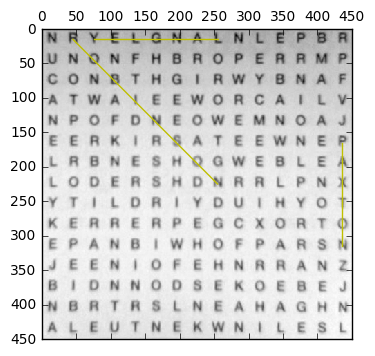

In [59]:
# Draw_line example, using indices going from left to right, top to bottom.
plt.matshow(test1, cmap=cm.gray)
draw_line(plt, 8, 2, 30)
draw_line(plt, 1, 113, 30)
draw_line(plt, 89, 164, 30)

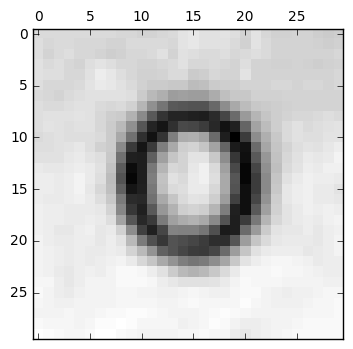

In [25]:
# Note: Make sure it returns arrays in such a way that 'F' is used to reshape not 'C'.
def get_characters(ndimarray, as_vectors):
    """This allows the extraction of individual character images as 30 by 30 matrices
       ndimarray: the matrix of pixels for every character
       as_vectors: if this is true, a 225 by 900-element matrix is returned."""
    letters = []
    cols = (ndimarray.shape[1])
    rows = (ndimarray.shape[0])
    col_step = cols//GRID_LENGTH
    row_step = rows//GRID_LENGTH
    for current_row_start in range(0, rows, row_step):
        for slice_start in range(0,cols,col_step):
            letter = []
            for i in range(current_row_start,current_row_start+row_step):
                row_of_single_letter = ndimarray[i][slice_start:slice_start+col_step]
                letter+=[row_of_single_letter]
            letters+=[letter]
    if as_vectors:
        return np.array([np.reshape(np.transpose(feature_vector), (900,), order='C') for feature_vector in np.array(letters)])
    else:
        return np.array(letters)

# Examples
plt.matshow(np.reshape(get_characters(test1, True)[23], (30, 30), order='F'), cmap=cm.gray)

# Step 2: Classification

In [26]:
classified_mat = classify(train_data, train_labels, get_characters(test1, True))
# Reshaping into 15 by 15 matrix
# as number labels:
print(np.reshape(classified_mat,(GRID_LENGTH,GRID_LENGTH)))
# as letters:
print(np.reshape(np.array([chr(96+n) for n in classified_mat]), (GRID_LENGTH,GRID_LENGTH)))

[[14 18 25  5 12  7 14  1 12 14 12  5 16  2 18]
 [21 14 15 14  6  8  2 18 15 16  5 18 18 13 16]
 [ 3 15 14  2 20  8  7  9 18 23 25  2 14  1  6]
 [ 1 20 23  1  9  5  5 23 15 18  3  1  9 12 22]
 [14 16 15  6  4 14  5 15 23  5 13 14 15  1 10]
 [ 5  5 18 11  9 18 19  1 20  5  5 23 14  5 16]
 [12 18  2 14  5 19  8 15  7 23  5  2 12  5  1]
 [12 15  4  5 18 19  8  4 14 18 18 12 16 14 24]
 [20 20  9 12  4 18  9 25  4 21  9  8 25 15 20]
 [11  5 18 18  5 18 16  5  7  3 24 15 18 20 15]
 [ 5 16  1 14  2  9 23  8 15  6 16  1 18 19 14]
 [10  5  5 14  9 15  6  5  8 14 18 18  1 14 26]
 [ 2  9  4 14 14 15  4 19  5 11 15  5  2  5 10]
 [14  2 18 20 18 19 12 14  5  1  8  1  7  8 14]
 [ 1 12  5 21 20 14  5 11 23 14  9 12  5 19 12]]
[['n' 'r' 'y' 'e' 'l' 'g' 'n' 'a' 'l' 'n' 'l' 'e' 'p' 'b' 'r']
 ['u' 'n' 'o' 'n' 'f' 'h' 'b' 'r' 'o' 'p' 'e' 'r' 'r' 'm' 'p']
 ['c' 'o' 'n' 'b' 't' 'h' 'g' 'i' 'r' 'w' 'y' 'b' 'n' 'a' 'f']
 ['a' 't' 'w' 'a' 'i' 'e' 'e' 'w' 'o' 'r' 'c' 'a' 'i' 'l' 'v']
 ['n' 'p' 'o' 'f' 'd' 'n' '

In [27]:
# These are the actual labels for the letters.
test_labels = np.array([14,18,25, 5,12, 7,14, 1,12,14,12, 5,16, 2,18,
                        21,14,15,14, 6, 8, 2,18,15,16, 5,18,18,13,16,
                         3,15,14, 2,20, 8, 7, 9,18,23,25, 2,14, 1, 6,
                         1,20,23, 1, 9, 5, 5,23,15,18, 3, 1, 9,12,22,
                        14,16,15, 6, 4,14, 5,15,23, 5,13,14,15, 1,10,
                         5, 5,18,11, 9,18,19, 1,20, 5,5 ,23,14, 5,16,
                        12,18, 2,14, 5,19, 8,15, 7,23, 5, 2,12, 5, 1,
                        12,15, 4, 5,18,19, 8, 4,14,18,18,12,16,14,24,
                        25,20, 9,12, 4,18, 9,25, 4,21, 9, 8,25,15,20,
                        11, 5,18,18, 5,18,16, 5, 7, 3,24,15,18,20,15,
                         5,16, 1,14, 2, 9,23, 8,15, 6,16, 1,18,19,14,
                        10, 5, 5,14, 9,15, 6, 5, 8,14,18,18, 1,14,26,
                         2, 9, 4,14,14,15, 4,19, 5,11,15, 5, 2, 5,10,
                        14, 2,18,20,18,19,12,14, 5, 1, 8, 1, 7, 8,14,
                         1,12, 5,21,20,14, 5,11,23,14, 9,12, 5,19,12])
print(np.reshape(test_labels,(GRID_LENGTH,GRID_LENGTH)))
print(np.reshape(np.array([chr(96+n) for n in test_labels]), (GRID_LENGTH,GRID_LENGTH)))

[[14 18 25  5 12  7 14  1 12 14 12  5 16  2 18]
 [21 14 15 14  6  8  2 18 15 16  5 18 18 13 16]
 [ 3 15 14  2 20  8  7  9 18 23 25  2 14  1  6]
 [ 1 20 23  1  9  5  5 23 15 18  3  1  9 12 22]
 [14 16 15  6  4 14  5 15 23  5 13 14 15  1 10]
 [ 5  5 18 11  9 18 19  1 20  5  5 23 14  5 16]
 [12 18  2 14  5 19  8 15  7 23  5  2 12  5  1]
 [12 15  4  5 18 19  8  4 14 18 18 12 16 14 24]
 [25 20  9 12  4 18  9 25  4 21  9  8 25 15 20]
 [11  5 18 18  5 18 16  5  7  3 24 15 18 20 15]
 [ 5 16  1 14  2  9 23  8 15  6 16  1 18 19 14]
 [10  5  5 14  9 15  6  5  8 14 18 18  1 14 26]
 [ 2  9  4 14 14 15  4 19  5 11 15  5  2  5 10]
 [14  2 18 20 18 19 12 14  5  1  8  1  7  8 14]
 [ 1 12  5 21 20 14  5 11 23 14  9 12  5 19 12]]
[['n' 'r' 'y' 'e' 'l' 'g' 'n' 'a' 'l' 'n' 'l' 'e' 'p' 'b' 'r']
 ['u' 'n' 'o' 'n' 'f' 'h' 'b' 'r' 'o' 'p' 'e' 'r' 'r' 'm' 'p']
 ['c' 'o' 'n' 'b' 't' 'h' 'g' 'i' 'r' 'w' 'y' 'b' 'n' 'a' 'f']
 ['a' 't' 'w' 'a' 'i' 'e' 'e' 'w' 'o' 'r' 'c' 'a' 'i' 'l' 'v']
 ['n' 'p' 'o' 'f' 'd' 'n' '

In [28]:
# Calculate how much the classifier got correct.
def correctly_processed(classified,actual,percentage):
    correct=0
    for i in range(0,classified.shape[0]):
        if (classified[i]==actual[i]):
            correct+=1
    return int(correct/(0.01*classified.shape[0] if percentage else 1))

print(str(correctly_processed(classified_mat,test_labels,False))
      + " letters were correctly labeled which is about "
      + str(correctly_processed(classified_mat,test_labels,True)) + "% of the letters.")

224 letters were correctly labeled which is about 99% of the letters.


In [75]:
GRID_TO_SEARCH=classified_mat
#Give every element a unique number because the functions to be used such as diagonal do not preserve indices
indices_grid=np.reshape(range(GRID_TO_SEARCH.shape[0]), (GRID_LENGTH,GRID_LENGTH))
print(indices_grid)

def search(list_to_search,word,direction='A'):
    """This returns a list of tuples. In each tuple, the first value is the index of where the word could begin, the second is the index of
       where it could end, and the third is the number of characters that match the word to search with.
       list_to_search: list of tuples. In each tuple, the first value is the original index of the label, the second is the label found
                       using classify.
       word: word to search with
       direction: direction to search in. It can be 'F' for forward, 'B' for back or 'A' for all."""
    if (len(word)>len(list_to_search)):
        raise ValueError("Word is longer than the list.")
    unzipped=list(zip(*list_to_search))
    orig_indices=list(unzipped[0])
    
    if (direction=='F'):
        #Search forwards
        arr_to_search=np.array(unzipped[1])
        pos=0
        forward=[]
        while len(word)<=len(arr_to_search[pos:]):
            num_correct = sum(word==(arr_to_search[pos:pos+len(word)]))
            if num_correct>0:
                forward+=[(orig_indices[pos],orig_indices[pos+len(word)-1],num_correct)]
            pos+=1
        return forward
    elif (direction=='B'):
        #Search backwards
        reversed_list=list(list_to_search)
        reversed_list.reverse()
        return search(reversed_list,word,'F')
    else:
        #Search in all directions and combine
        return search(list_to_search,word,'F') + search(list_to_search,word,'B')
#Examples

#robinson
indices1=np.diagonal(indices_grid,1)
print(search(list(zip(indices1,[GRID_TO_SEARCH[indx] for indx in indices1])),[ord(c)-96 for c in list("robinson")]))

#langley
indices2=indices_grid[0]
print(search(list(zip(indices2,[GRID_TO_SEARCH[indx] for indx in indices2])),[ord(c)-96 for c in list("langley")]))

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14]
 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29]
 [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44]
 [ 45  46  47  48  49  50  51  52  53  54  55  56  57  58  59]
 [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74]
 [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89]
 [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
 [105 106 107 108 109 110 111 112 113 114 115 116 117 118 119]
 [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134]
 [135 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
 [150 151 152 153 154 155 156 157 158 159 160 161 162 163 164]
 [165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]
 [180 181 182 183 184 185 186 187 188 189 190 191 192 193 194]
 [195 196 197 198 199 200 201 202 203 204 205 206 207 208 209]
 [210 211 212 213 214 215 216 217 218 219 220 221 222 223 224]]
[(1, 113, 8), (49, 161, 1), (81, 193, 1), (97, 209, 1)

In [30]:
indices1=np.diagonal(indices_grid,1)
list_to_search=list(zip(indices1,[GRID_TO_SEARCH[indx] for indx in indices1]))
unzipped=list(zip(*list_to_search))
arr_to_search=np.array(unzipped[1])
reversed_list=list(list_to_search)
reversed_list.reverse()

print(list_to_search)
print(reversed_list)
print(unzipped[1])
print(arr_to_search)

[(1, 18), (17, 15), (33, 2), (49, 9), (65, 14), (81, 19), (97, 15), (113, 14), (129, 21), (145, 24), (161, 1), (177, 1), (193, 5), (209, 14)]
[(209, 14), (193, 5), (177, 1), (161, 1), (145, 24), (129, 21), (113, 14), (97, 15), (81, 19), (65, 14), (49, 9), (33, 2), (17, 15), (1, 18)]
(18, 15, 2, 9, 14, 19, 15, 14, 21, 24, 1, 1, 5, 14)
[18 15  2  9 14 19 15 14 21 24  1  1  5 14]


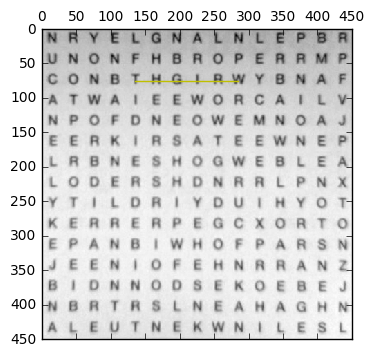

In [74]:
w="wright"
lists_searched = []
#Traversing row by row
for r in range(0,GRID_LENGTH-1):
    lists_searched+=search(list(zip(indices_grid[r],[GRID_TO_SEARCH[indx] for indx in indices_grid[r]])),[ord(c)-96 for c in list(w)])
#Traversing column by column

#Traversing diagonals parallel to leading diagonal

#Traversing diagonals perpendicular to leaing diagonal

#Likeliest is the tuple that has the biggest third element
likeliest=sorted(lists_searched,key=lambda trituple: trituple[2])[len(lists_searched)-1]
#Return the indices to start and end the line from.
likeliest_tuple=likeliest[:2]

plt.matshow(test1, cmap=cm.gray)
draw_line(plt,int(likeliest_tuple[0]), int(likeliest_tuple[1]), 30)

(1, 2)